In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("data/train_cleaned.csv")

X = train_df[["brand", "model", "age", "milage", "fuel_type", "engine_hp"]]
y = train_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print(len(X_train))
print(len(X_test))

113014
28254


Normalization due to great difference between milage and other values

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predicting on 5 cars

In [6]:
y_pred = model.predict(X_test)

Visualsing the metrics

In [7]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 9915.671175299358
MSE: 175701488.83774027
R²: 0.5745753006634658


In [8]:
joblib.dump(model, "regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

     Feature  Coefficient  Abs_Coefficient
3     milage -7809.106451      7809.106451
2        age -5852.802936      5852.802936
5  engine_hp  5488.197748      5488.197748
0      brand   698.866339       698.866339
4  fuel_type   279.038265       279.038265
1      model   179.964950       179.964950


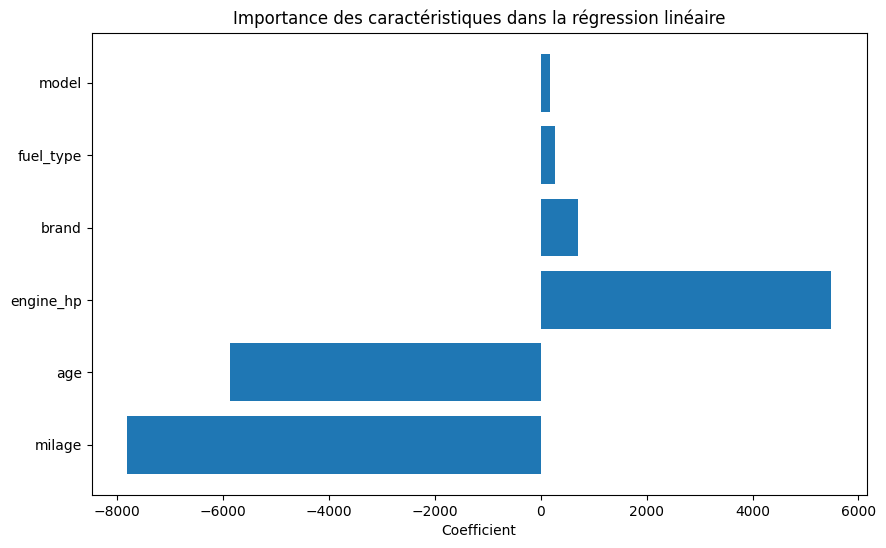

In [9]:
# Obtenir les coefficients
coefficients = model.coef_

# Créer un DataFrame pour associer les coefficients avec les features
features = X.columns
coeff_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})

# Trier par les coefficients en valeur absolue pour identifier les plus importantes
coeff_df["Abs_Coefficient"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by="Abs_Coefficient", ascending=False)

# Afficher les résultats
print(coeff_df)
# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_df["Feature"], coeff_df["Coefficient"])
plt.xlabel("Coefficient")
plt.title("Importance des caractéristiques dans la régression linéaire")
plt.show()
